### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 3

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Легиньких Галина
##### Группа:   НФИбд-02-21

##### Москва 2024
***

### Вариант № 6 (Wine Data Set)

Название файла: wine.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Wine 

Первый признак: alcohol (столбец No 2) 

Второй признак: color-intensity (столбец No 11) 

Класс: cultivar (столбец No 1) 

Алгоритмы: K-means, Agglomerative Clustering, DBSCAN, Gaussian Mixture Model 

Меры качества: условная энтропия, парные меры TP, FN, FP, TN, индекс Rand 

Найти лучший алгоритм кластеризации относительно меры качества: индекс Rand 

## Выполнение

1. Считайте из заданного набора данных репозитария UCI значения двух признаков и метки класса.  

Считала заданный набор данных из репозитария UCI. (У меня это Wine Data Set)

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt

# данные из репозитария UCI
url = \
    "https://archive.ics.uci.edu/ml/"+\
    "machine-learning-databases/wine/wine.data"

wine = pd.read_csv(url, header=None)
wine = wine[[1,10, 0]]
wine.columns = ['Alcohol',  'Color intensity', 'Cultivar']
wine

,Alcohol,Color intensity,Cultivar
0,14.23,5.64,1
1,13.20,4.38,1
2,13.16,5.68,1
3,14.37,7.80,1
4,13.24,4.32,1
...,...,...,...
173,13.71,7.70,3
174,13.40,7.30,3
175,13.27,10.20,3
176,13.17,9.30,3


2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на медианные значения того класса, к которому относится запись с пропущенным значением в признаке. 

Среди меток класса нет пропущенных значений. Среди признаков тоже.

In [2]:
print('Число пропущенных значений:')
for col in wine.columns:
    print("NaN in", col,"=", wine[col].isna().sum())

Число пропущенных значений:
NaN in Alcohol = 0
NaN in Color intensity = 0
NaN in Cultivar = 0


3. Если количество различных меток класса больше пяти, то объедините некоторые (наименее многочисленные) классы, чтобы общее количество классов не превышало пять.

В датафрейме 3 метки класса.

In [3]:
len(wine['Cultivar'].unique())

3

4. Визуализируйте набор данных в виде точек плоскости с координатами, соответствующими двум признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.  

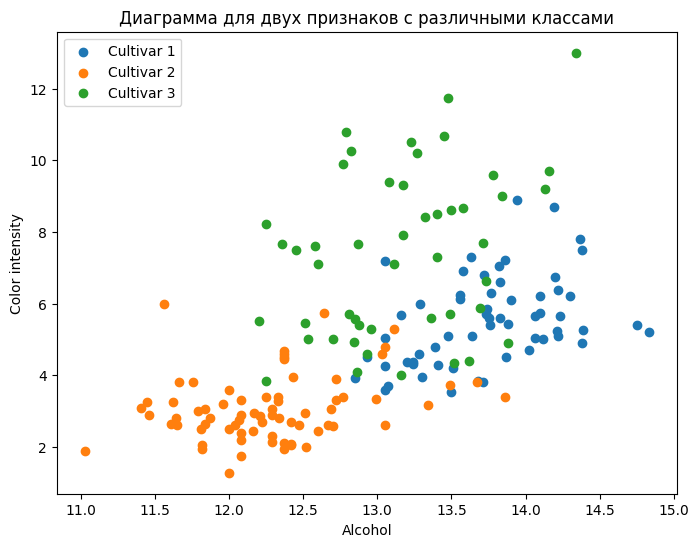

In [4]:
X_feature1 = wine['Alcohol']
X_feature2 = wine['Color intensity']
Y_class = wine['Cultivar']  # Целевая переменная (класс)

plt.figure(figsize=(8, 6))

# Построение диаграммы рассеяния
for class_value in wine['Cultivar'].unique():
    plt.scatter(X_feature1[Y_class == class_value], 
                X_feature2[Y_class == class_value], 
                label=f'Cultivar {class_value}') #Цвет

# Подписи осей и заголовок
plt.xlabel('Alcohol')
plt.ylabel('Color intensity')
plt.title('Диаграмма для двух признаков с различными классами')

# Легенда
plt.legend()

# Отображение диаграммы
plt.show()

5. Проведите кластеризацию набора данных из двух признаков с помощью алгоритмов, указанных в индивидуальном задании, для случая, когда количество кластеров равно количеству классов в исходном наборе (с учетом корректировки). В случае отсутствия сходимости алгоритма измените аргументы по умолчанию или используйте для кластеризации случайную выборку из набора данных. 

Убрала метку класса.

In [5]:
wine2 = wine[['Alcohol','Color intensity']]
wine2.head()

,Alcohol,Color intensity
0,14.23,5.64
1,13.20,4.38
2,13.16,5.68
3,14.37,7.80
4,13.24,4.32


In [6]:
def plot_cluster(ax, wine2, y, title): # блок прорисовки графика
    ax.scatter(wine2['Alcohol'], wine2['Color intensity'], c=y, s=100)
    ax.set_xlabel('Alcohol')
    ax.set_ylabel('Color Intensity')
    ax.set_title(title)
    ax.grid(True)

#### Алгоритм K-means

In [7]:
from sklearn.cluster import KMeans
# модель
model1 = KMeans(n_clusters=3)
# тренируем модель
model1.fit(wine2)
# присваиваем метку каждой точке набора
yhat1 = model1.predict(wine2)
yhat1

C:\Users\galin\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\galin\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1])

 #### Алгоритм Agglomerative Clustering

In [8]:
# иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering
# модель иерархической кластеризации, расстояние между кластерами методом Ward
model2 = AgglomerativeClustering(n_clusters=3)
# тренируем модель и присваиваем метку каждой точке набора
yhat2 = model2.fit_predict(wine2)
yhat2

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

#### Алгоритм DBSCAN 

In [9]:
# кластеризация dbscan 
from sklearn.cluster import DBSCAN
# модель
model3 = DBSCAN(eps=0.5, min_samples=5)
# тренируем модель и присваиваем метку каждой точке набора
yhat3 = model3.fit_predict(wine2)
yhat3

array([ 0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1, -1,  1, -1,  0,
       -1,  0,  0,  1,  0, -1, -1,  0,  0,  0,  0, -1,  0, -1, -1,  1,  1,
        0, -1, -1,  0,  0, -1, -1,  1], dtype=int64)

#### Алгоритм Gaussian Mixture Model

In [10]:
# кластеризация при помощи гауссовских смесей
from sklearn.mixture import GaussianMixture
# модель
model4 = GaussianMixture(n_components=3)
# тренируем модель
model4.fit(wine2)
# присваиваем метку каждой точке набора
yhat4 = model4.predict(wine2)
yhat4

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

Нарисовала графики для всех алгоритмов.

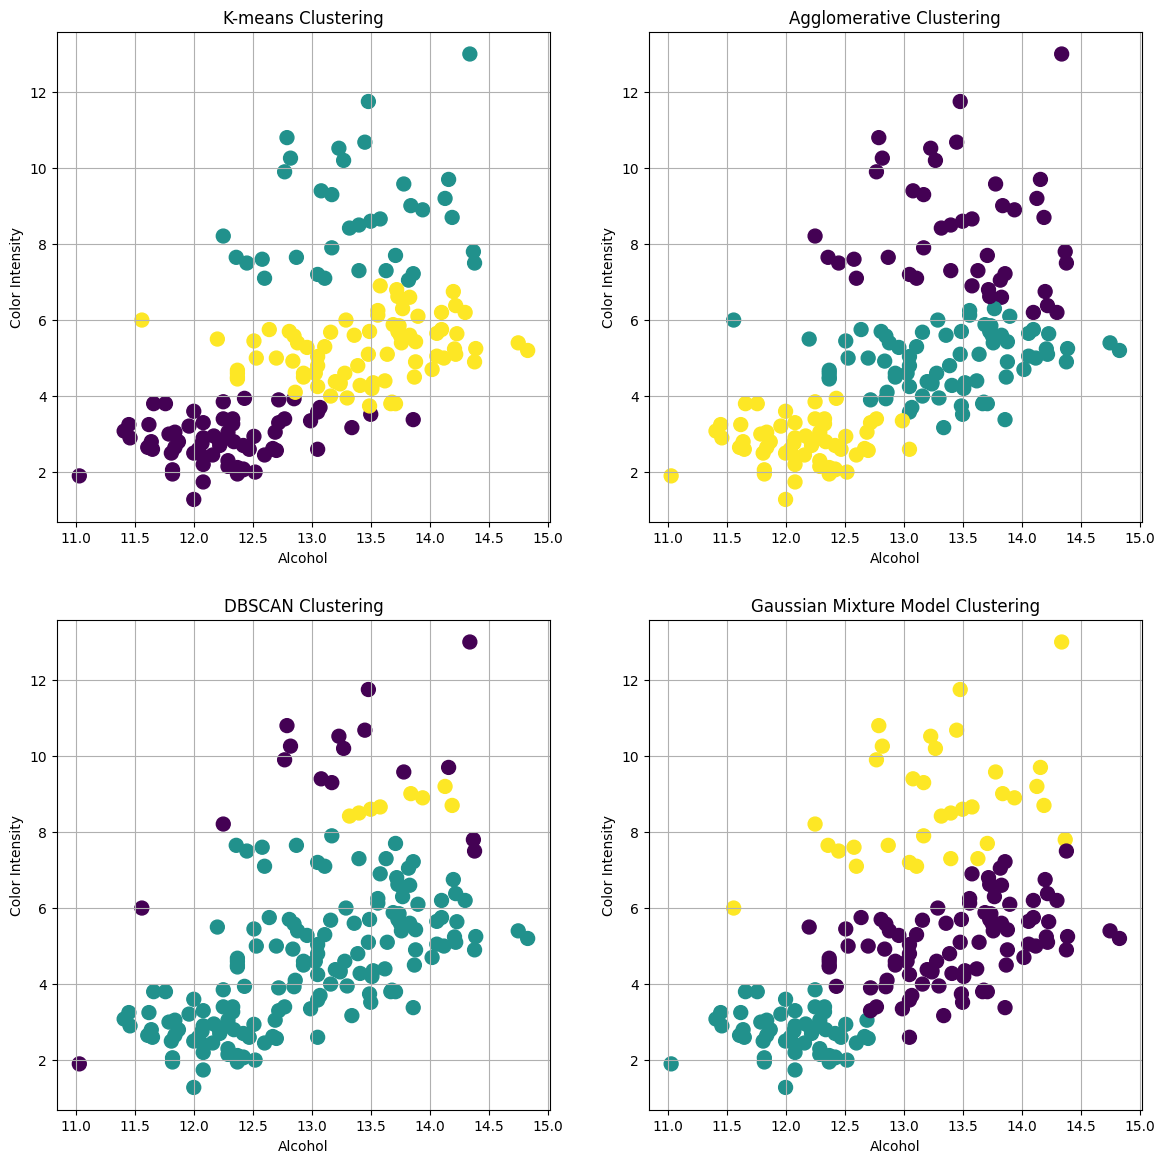

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14))
plot_cluster(axs[0, 0], wine2, yhat1, 'K-means Clustering')
plot_cluster(axs[0, 1], wine2, yhat2, 'Agglomerative Clustering')
plot_cluster(axs[1, 0], wine2, yhat3, 'DBSCAN Clustering')
plot_cluster(axs[1, 1], wine2, yhat4, 'Gaussian Mixture Model Clustering')

6. Для каждого из алгоритмов кластеризации, указанных в индивидуальном задании, постройте матрицу сопряженности, используя функцию contingency_matrix() из scikit-learn, и найдите значения мер качества кластеризации, указанные в индивидуальном задании, на основании данных в матрице сопряженности, не используя другие функции из scikit-learn или других фреймворков.  

In [12]:
import numpy as np
from sklearn.metrics.cluster import contingency_matrix

def compute_metrics(y_true, y_pred):
    # Построение матрицы сопряженности
    cm = contingency_matrix(y_true, y_pred)
    
    # Общие статистики
    n = cm.sum()  # Общее количество элементов
    total_pairs = n * (n - 1) / 2  # Общее количество пар объектов
    
    # Вычисление парных мер (TP, FN, FP, TN)
    TP = np.sum(cm * (cm - 1)) / 2  # True Positives
    sum_over_rows = np.sum(cm, axis=1)
    FN = np.sum(sum_over_rows * (sum_over_rows - 1)) / 2 - TP  # False Negatives
    sum_over_cols = np.sum(cm, axis=0)
    FP = np.sum(sum_over_cols * (sum_over_cols - 1)) / 2 - TP  # False Positives
    TN = total_pairs - (TP + FP + FN)  # True Negatives
    
    # Индекс Рэнда (Rand Index)
    rand_index = (TP + TN) / total_pairs
    
    # Условная энтропия H(C|G)
    entropy_C_given_G = 0
    n_clusters = cm.shape[0]  # Количество кластеров
    for i in range(n_clusters):
        cluster_sum = np.sum(cm[i, :])
        if cluster_sum > 0:
            probabilities = cm[i, :] / cluster_sum
            entropy_C_given_G -= np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps)) * (cluster_sum / n)
    
    return {
        'Contingency Matrix': cm,
        'TP': TP,
        'FN': FN,
        'FP': FP,
        'TN': TN,
        'Rand Index': rand_index,
        'Conditional Entropy': entropy_C_given_G
    }

# Пример вычисления метрик для алгоритмов
metrics_kmeans = compute_metrics(wine.iloc[:, 2], yhat1)
metrics_agg = compute_metrics(wine.iloc[:, 2], yhat2)
metrics_dbscan = compute_metrics(wine.iloc[:, 2], yhat3)
metrics_gmm = compute_metrics(wine.iloc[:, 2], yhat4)

# Печать результатов
def print_metrics(metrics, title):
    print(f"\n{title}:")
    print(f"Contingency Matrix:\n{metrics['Contingency Matrix']}")
    print(f"True Positives (TP): {metrics['TP']}")
    print(f"False Negatives (FN): {metrics['FN']}")
    print(f"False Positives (FP): {metrics['FP']}")
    print(f"True Negatives (TN): {metrics['TN']}")
    print(f"Rand Index: {metrics['Rand Index']:.4f}")
    print(f"Conditional Entropy: {metrics['Conditional Entropy']:.4f}")

In [13]:
print_metrics(metrics_kmeans, "K-means Clustering")


K-means Clustering:
Contingency Matrix:
[[ 4  8 47]
 [60  0 11]
 [ 1 28 19]]
True Positives (TP): 3489.0
False Negatives (FN): 1835.0
False Positives (FP): 2147.0
True Negatives (TN): 8282.0
Rand Index: 0.7472
Conditional Entropy: 0.8480


In [14]:
print_metrics(metrics_agg, "Agglomerative Clustering")


Agglomerative Clustering:
Contingency Matrix:
[[15 44  0]
 [ 0 14 57]
 [29 18  1]]
True Positives (TP): 3297.0
False Negatives (FN): 2027.0
False Positives (FP): 2152.0
True Negatives (TN): 8277.0
Rand Index: 0.7347
Conditional Entropy: 0.8497


In [15]:
print_metrics(metrics_dbscan, "DBSCAN Clustering")


DBSCAN Clustering:
Contingency Matrix:
[[ 2 55  2]
 [ 2 69  0]
 [13 29  6]]
True Positives (TP): 4333.0
False Negatives (FN): 991.0
False Positives (FP): 7459.0
True Negatives (TN): 2970.0
Rand Index: 0.4636
Conditional Entropy: 0.5721


In [16]:
print_metrics(metrics_gmm, "Gaussian Mixture Model Clustering")


Gaussian Mixture Model Clustering:
Contingency Matrix:
[[54  0  5]
 [18 52  1]
 [19  1 28]]
True Positives (TP): 3469.0
False Negatives (FN): 1855.0
False Positives (FP): 2565.0
True Negatives (TN): 7864.0
Rand Index: 0.7194
Conditional Entropy: 0.8012


7. Определите алгоритм кластеризации, оптимальный с точки зрения меры качества кластеризации, указанной в индивидуальном задании. 

1. K-means Clustering: лучший выбор с точки зрения TP и Rand Index.
2. Agglomerative Clustering: также неплохой вариант, но уступает K-means.
3. DBSCAN: несмотря на высокий TP, качество кластеризации (высокие FP и низкий Rand Index) делает его менее предпочтительным.
4. Gaussian Mixture Model: не лучший выбор из-за высоких FP и относительно низкого Rand Index.

**K-means Clustering** является оптимальным алгоритмом кластеризации с точки зрения качества, учитывая все представленные метрики.

8. Для оптимального алгоритма кластеризации из предыдущего пункта визуализируйте области принятия решения и набор данных в виде точек на плоскости с координатами, соответствующими двум признакам, отображая точки различных кластеров разными цветами. Подпишите оси и рисунок, создайте легенду набора данных. 

Визуализировала область принятия решения и набор данных ввиде точек. Добавила еще центры кластеров.

In [17]:
wine2 = wine2.values

C:\Users\galin\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


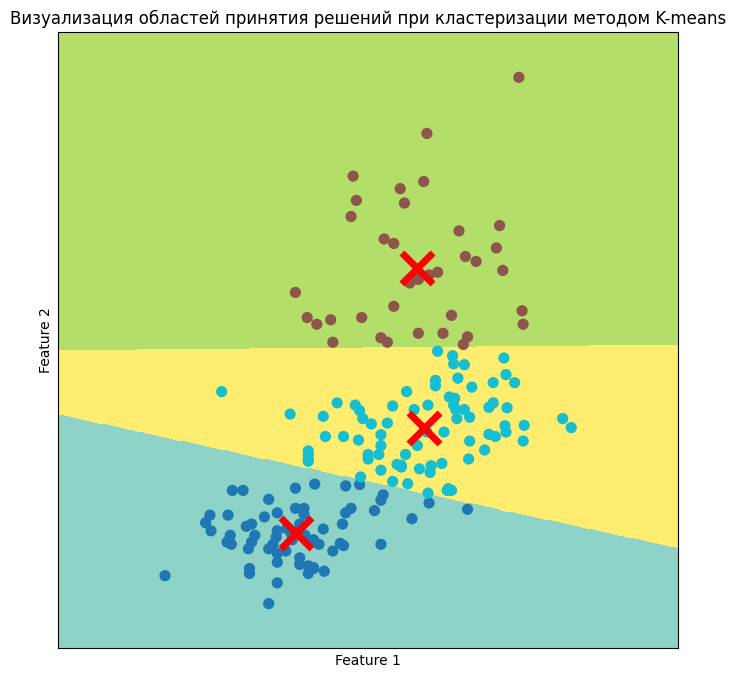

In [18]:
h = 0.02  

# Определение границ графика
x_min, x_max = wine2[:, 0].min() - 1, wine2[:, 0].max() + 1
y_min, y_max = wine2[:, 1].min() - 1, wine2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Получение меток для каждой точки в сетке
Z = model1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Визуализация областей принятия решений
plt.figure(figsize=(8, 8))
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Set3,
    aspect="auto",
    origin="lower",
)

# Получение меток кластеров для данных
labels = model1.labels_

# Отображение точек данных с цветами в зависимости от кластеров
plt.scatter(wine2[:, 0], wine2[:, 1], c=labels, cmap=plt.cm.tab10, s=50)

# Отображение центров кластеров как красные X
centers = model1.cluster_centers_
plt.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="x",
    s=500,
    lw=5,
    color="r",
)

# Настройка графика
plt.title("Визуализация областей принятия решений при кластеризации методом K-means")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel('Feature 1')  # Замените на название первого признака
plt.ylabel('Feature 2')  # Замените на название второго признака
plt.xticks(())
plt.yticks(())
plt.show()
